Gradient Descent
--------

# Theory

## Definition


## Examples


# Implementation


## Imports

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt
import warnings

In [2]:
domain = [-2,3]
func = x**2         # use sp. methods only "i.e sp.cos()"

## Algorithm


In [3]:
def GD(f_prime: Callable, x_0: float, gamma: float, TOL: float = 1e-5, maxiter: int = int(1e5)) -> tuple[float, float, int]:
    '''
    Search for the local minimum of a function using Gradient Decent algorithm.

    Args:
        f_prime: The derivative of the function to be optimized
        x_0: Starting value at the search space
        gamma: Parameter control how far down the gradient the method walks in one step, usually called "step size or learning rate"
        TOL: Tolerance at which the algorithm terminate and return a solution. Defaults to 1e-5.
        maxiter: Maximum iterations. Used as a safeguard to prevent infinite loops. Defaults to int(1e5).

    Returns:
        The approximated x value where the function local minium is, the history of the search journey and the number of steps
    '''

    x = np.zeros(maxiter)
    x[0] = x_0

    for i in range(maxiter):
        
        x[i+1] = x[i] - gamma*f_prime(x[i])
        delta_x = abs(x[i] - x[i+1])

        # convergence condition
        if delta_x < TOL:
            break


        # handel divergence & not enough iterations
        if delta_x > 1e6:
            warnings.warn(f"GD diverged where delta x = {delta_x}, choose smaller step size")
            break
        elif i+1==maxiter-1:
            warnings.warn(f"GD need more iterations steps = {i+1}, increase maxiter argument")
            break
    
    x_min, history, steps= x[i+1], x[:i+2], i+1

    return x_min, history, steps

## Results Visualization & Basic Convergence Analysis
This investigation aims to illustrate the convergence of gradient descent algorithm and show case it behavior. The following metrics/visualization used are
- Function Plot: Illustrate the journey of gradient decent optimizer
- x Value Convergence Plot: Illustrate the convergence/divergence of the gradient decent optimizer

In [4]:
# domain
xx = np.linspace(*domain)

# function
f = sp.lambdify('x', func)

# function derivative
f_prime = sp.lambdify('x', sp.diff(func))

# gradient decent
x_min, history, steps = GD(f_prime=f_prime, x_0=2.5, gamma=0.75)

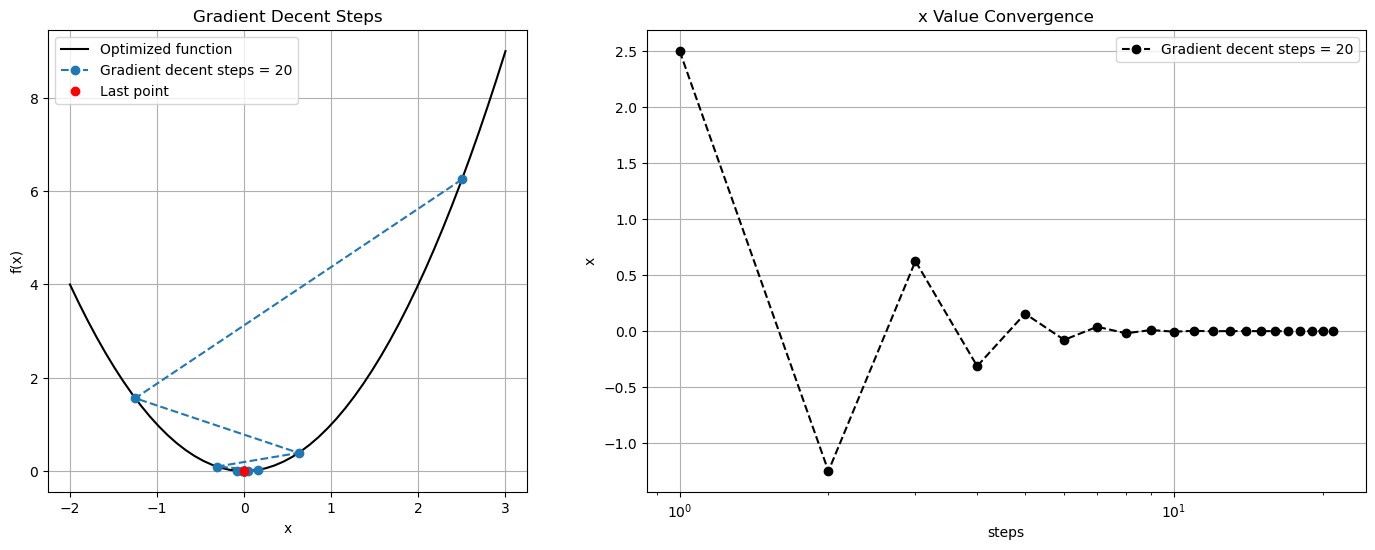

In [5]:
fig, ax = plt.subplots(1,2, figsize=(17,6), gridspec_kw={'width_ratios': [1, 1.5]})

# gradient decent steps plot
ax[0].plot(xx, f(xx), "k", label="Optimized function")
ax[0].plot(history, f(history), "--o", label=f"Gradient decent steps = {steps}")
ax[0].plot(history[-1], f(history[-1]), "ro", label="Last point")
ax[0].set(xlabel="x", ylabel="f(x)", title="Gradient Decent Steps")
ax[0].grid(True)
ax[0].legend()

# x value convergence
ax[1].plot(range(1, steps+2), history, "k--o", label=f"Gradient decent steps = {steps}")
ax[1].set(xscale='log', xlabel="steps", ylabel="x", title="x Value Convergence")
ax[1].grid(True)
ax[1].legend()

plt.show()

## Step Size ($\gamma$) Analysis


In [6]:
function = 3*sp.exp(x) / (x**2 + x + 1)

# function
f = sp.lambdify('x', function)

# function derivative
f_prime = sp.lambdify('x', sp.diff(function))

### Optimal Step Size ($\gamma$)

In [7]:
gammas = np.linspace(0.01, 1.7)

results=[]
with warnings.catch_warnings(record=True) as warning:
    for i, gamma in enumerate(gammas):
        _, _, steps = GD(f_prime=f_prime, x_0=2.5, gamma=gamma)

        if len(warning) >= 1:
            continue

        results.append([steps, gamma])
results = np.array(results)
gammas_steps, gammas = results[:,0], results[:,1]

# getting the optimal gamma
i = np.where(gammas_steps == np.min(gammas_steps))[0][0]
gamma_optimal = gammas[i]

### Error Convergence for Different Step Sizes ($\gamma$)

In [8]:
# true local minimum "for our starting value"
true_min = 1

errors=[]
with warnings.catch_warnings(record=True) as warning:
    for gamma in [0.01, 0.1, 0.5, 0.8, gamma_optimal]:
        _, history, steps = GD(f_prime=f_prime, x_0=2.5, gamma=gamma)

        if len(warning) >= 1:
            continue

        error = abs(history - true_min)
        errors.append([gamma, steps, error])

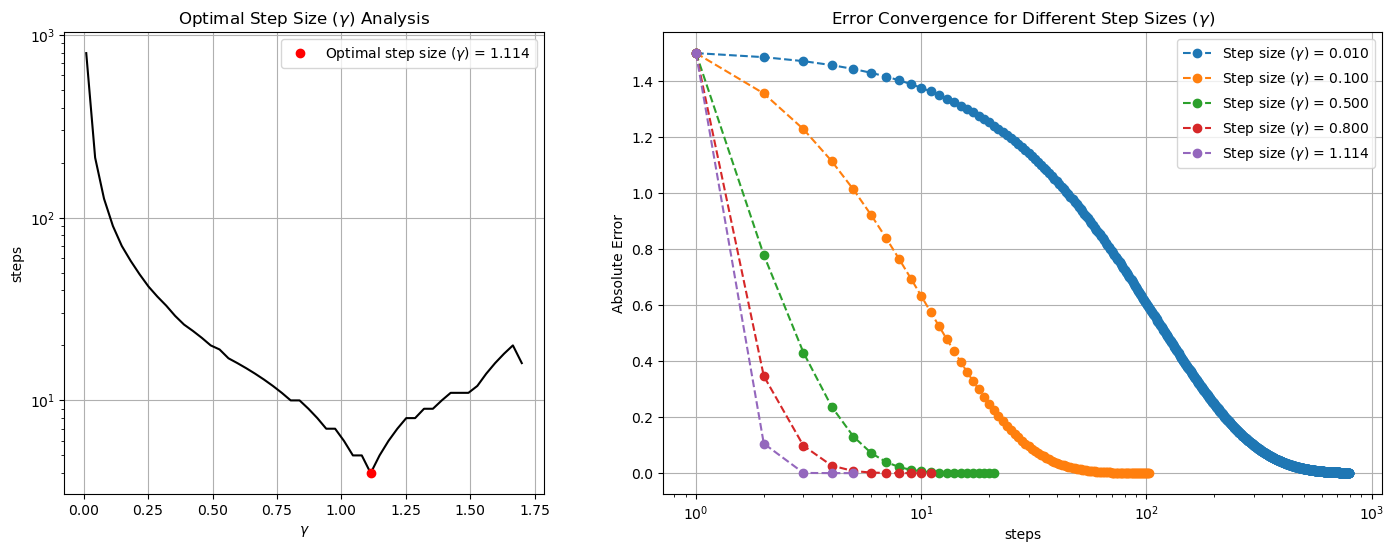

In [9]:
fig, ax = plt.subplots(1,2, figsize=(17,6), gridspec_kw={'width_ratios': [1, 1.5]})

# optimal step size
ax[0].plot(gammas, gammas_steps, "k")
ax[0].plot(gammas[i], gammas_steps[i], "ro", label=rf"Optimal step size ($\gamma$) = {gamma_optimal:.3f}")
ax[0].set(yscale="log", xlabel=r"$\gamma$", ylabel="steps", title=r"Optimal Step Size ($\gamma$) Analysis")
ax[0].grid(True)
ax[0].legend()

# error convergence for different step sizes
for gamma, steps, error in errors:
    ax[1].plot(range(1, steps+2), error, "--o", label=f"Step size ($\gamma$) = {gamma:.3f}")
ax[1].set(xscale='log', xlabel="steps", ylabel="Absolute Error", title=r"Error Convergence for Different Step Sizes ($\gamma$)")
ax[1].grid(True)
ax[1].legend()

plt.show()